TIME SERIES FORECASTING USING ARIMA METHOD

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

STEP 1: VISUALIZE THE DATA

In [51]:
# LOAD THE DATASET
df=pd.read_csv('Alcohol_Sales.csv')

In [52]:
df.head()

,DATE,S4248SM144NCEN
0,1992-01-01,3459
1,1992-02-01,3458
2,1992-03-01,4002
3,1992-04-01,4564
4,1992-05-01,4221


In [53]:
df.tail()

,DATE,S4248SM144NCEN
320,2018-09-01,12396
321,2018-10-01,13914
322,2018-11-01,14174
323,2018-12-01,15504
324,2019-01-01,10718


In [54]:
df.columns=['Month','Sales']
df.head()

,Month,Sales
0,1992-01-01,3459
1,1992-02-01,3458
2,1992-03-01,4002
3,1992-04-01,4564
4,1992-05-01,4221


In [55]:
#CONVERT MONTH INTO DATETIME
df['Month']=pd.to_datetime(df['Month'])
#SET MONTH AS INDEX
df.set_index('Month',inplace=True)
df.head()

,Sales
Month,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


In [56]:
df.describe()

,Sales
count,325.000000
mean,7886.400000
std,2914.269061
min,3031.000000
25%,5231.000000
50%,7481.000000
75%,9977.000000
max,15504.000000


<Axes: xlabel='Month'>

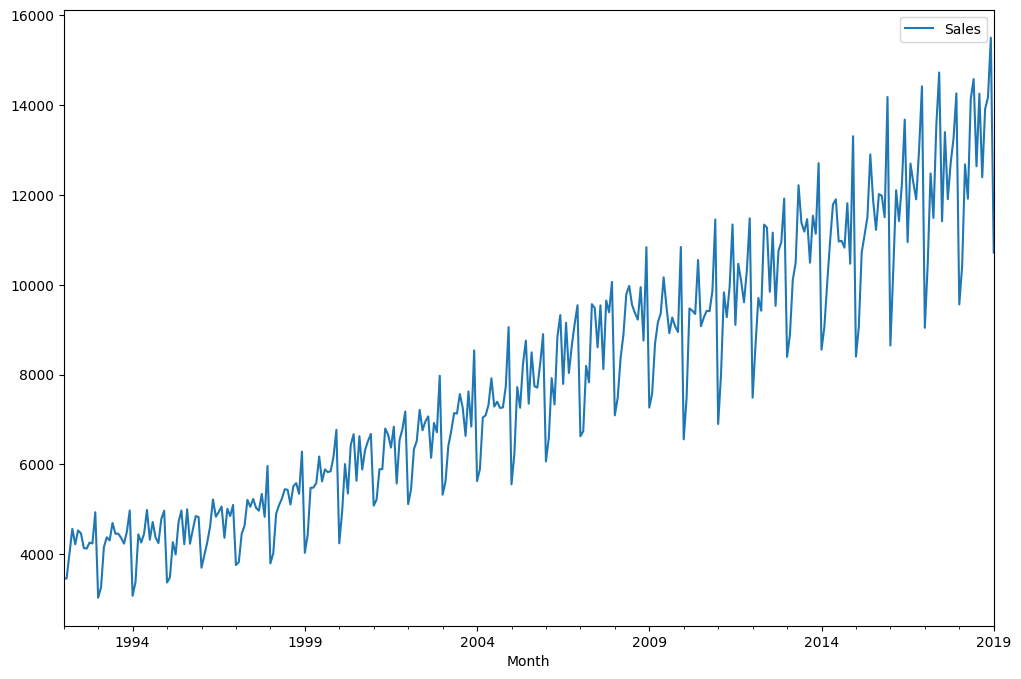

In [57]:
df.plot(figsize=(12,8))

STEP 2: TESTING FOR STATIONARITY

In [58]:
from statsmodels.tsa.stattools import adfuller

In [59]:
df.fillna(method='ffill',inplace=True)

C:\Users\Arnab\AppData\Local\Temp\ipykernel_6336\4116506308.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill',inplace=True)


In [60]:
test_result = adfuller(df['Sales'])

In [61]:
#CHECKING THE DATA IS STATIONARY OR NOT
def adfuller_test(sales):
    result = adfuller(sales)
    labels = ['ADF Test Statistic ','P-value','#lags used','Number of Observation Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value))
    if result[1]<= 0.05:
        print("Strong evidence against the null hypothesis(HO), reject the null hypothesis,Data has no unit root is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary")

In [62]:
adfuller_test(df['Sales'])

ADF Test Statistic  : 2.037404725913701
P-value : 0.9987196267088919
#lags used : 14
Number of Observation Used : 310
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary


STEP 3: PERFORM DIFFERENCING

In [63]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)

In [64]:
df['Sales'].shift(1)

Month
1992-01-01        NaN
1992-02-01     3459.0
1992-03-01     3458.0
1992-04-01     4002.0
1992-05-01     4564.0
               ...   
2018-09-01    14257.0
2018-10-01    12396.0
2018-11-01    13914.0
2018-12-01    14174.0
2019-01-01    15504.0
Name: Sales, Length: 325, dtype: float64

In [65]:
df['Seasonal First Difference'] = df['Sales'] - df['Sales'].shift(12)

In [66]:
df.head(14)

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1992-01-01,3459,NaN,NaN
1992-02-01,3458,-1.0,NaN
1992-03-01,4002,544.0,NaN
1992-04-01,4564,562.0,NaN
1992-05-01,4221,-343.0,NaN
1992-06-01,4529,308.0,NaN
1992-07-01,4466,-63.0,NaN
1992-08-01,4137,-329.0,NaN
1992-09-01,4126,-11.0,NaN


In [67]:
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic  : -3.3393107296695343
P-value : 0.013210159306746802
#lags used : 13
Number of Observation Used : 299
Strong evidence against the null hypothesis(HO), reject the null hypothesis,Data has no unit root is stationary


<Axes: xlabel='Month'>

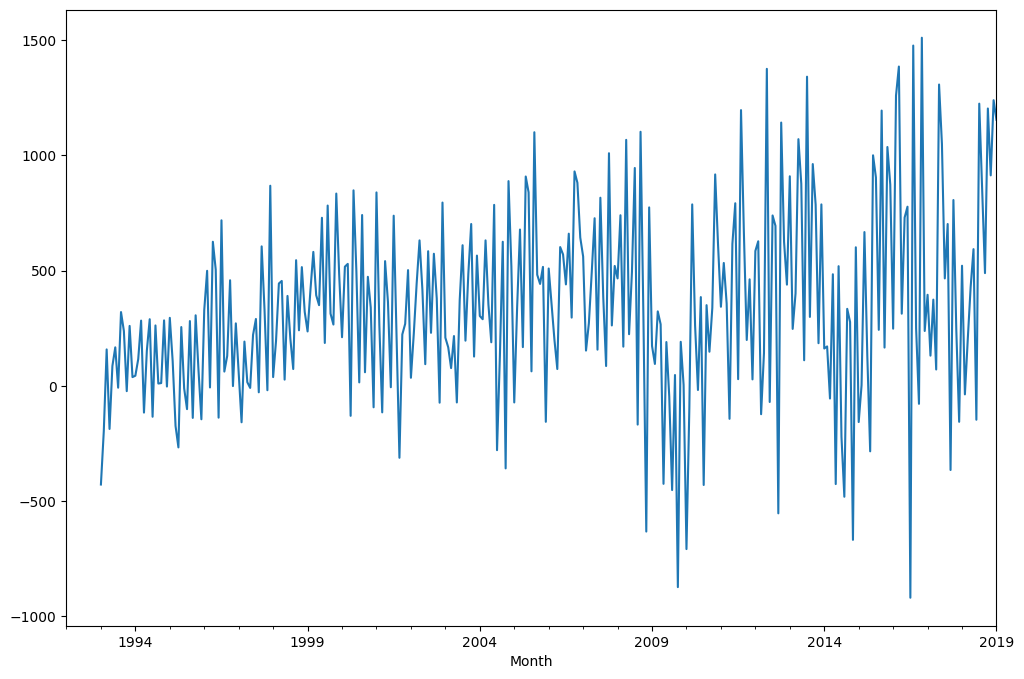

In [68]:
df['Seasonal First Difference'].plot(figsize=(12,8))

STEP 4: PLOT CORRELATION AND AUTOCORRELATION

In [69]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

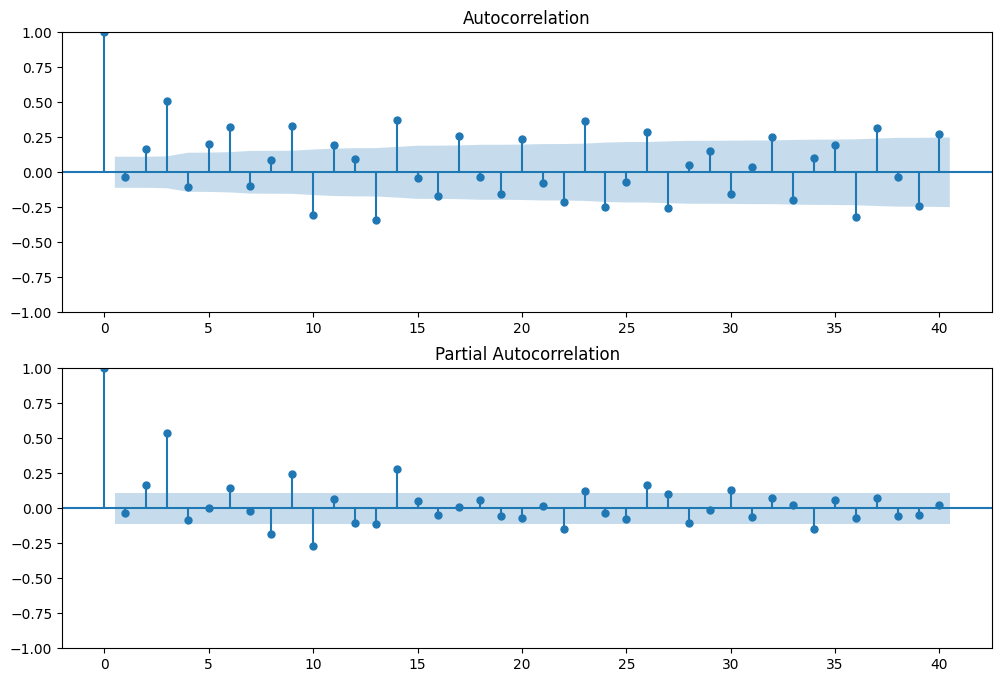

In [70]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

STEP 5 : CONSTRUCT THE ARIMA OR SEASONAL ARIMA BASED ON THE DATA

In [71]:
#THE DATA IS STATIONARY THATS WHY WE USE SEASONAL ARIMA METHOD 
import statsmodels.api as sm

In [72]:
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1,1,1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\Arnab\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Arnab\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='Month'>

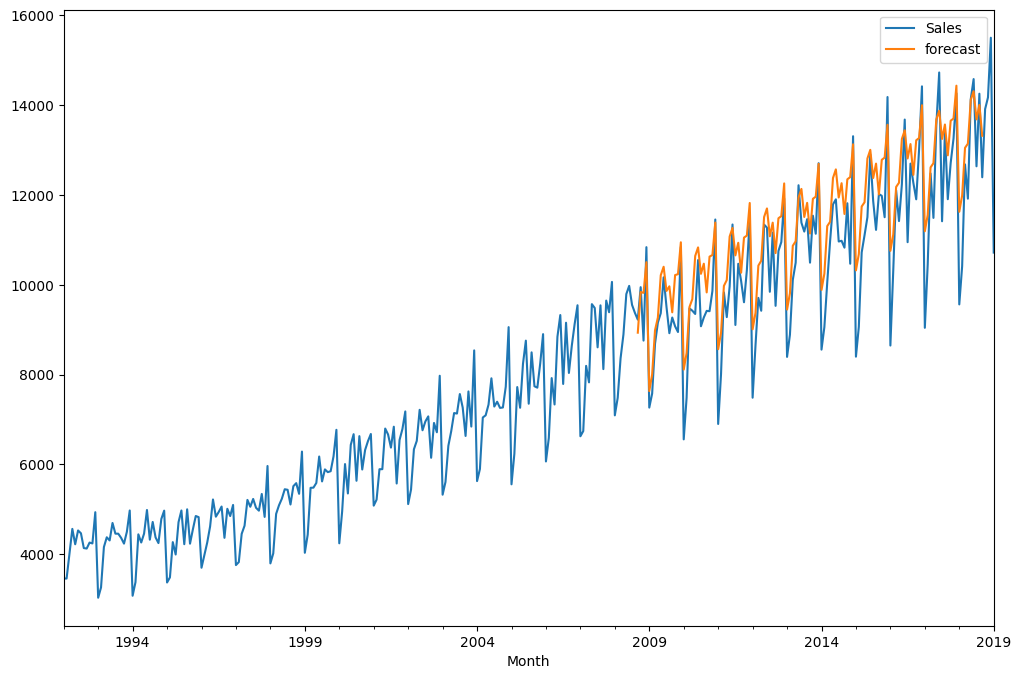

In [73]:
df['forecast']=results.predict(start=200,end=320,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

STEP 6: NEXT 24 MONTH SALES FORECAST

In [74]:
import pandas as pd
dates=pd.date_range('2019-01-01',periods=24,freq='M')
offset=pd.DateOffset(days=1)
new_dates=dates+offset
print(new_dates)

DatetimeIndex(['2019-02-01', '2019-03-01', '2019-04-01', '2019-05-01',
               '2019-06-01', '2019-07-01', '2019-08-01', '2019-09-01',
               '2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01',
               '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01',
               '2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01',
               '2020-10-01', '2020-11-01', '2020-12-01', '2021-01-01'],
              dtype='datetime64[ns]', freq=None)


C:\Users\Arnab\AppData\Local\Temp\ipykernel_6336\3131613760.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates=pd.date_range('2019-01-01',periods=24,freq='M')


In [75]:
future_dates_df=pd.DataFrame(index=new_dates,columns=df.columns)

In [79]:
combined_df=pd.concat([df,future_dates_df])
print(combined_df)

           Sales  Sales First Difference  Seasonal First Difference  forecast
1992-01-01  3459                     NaN                        NaN       NaN
1992-02-01  3458                    -1.0                        NaN       NaN
1992-03-01  4002                   544.0                        NaN       NaN
1992-04-01  4564                   562.0                        NaN       NaN
1992-05-01  4221                  -343.0                        NaN       NaN
...          ...                     ...                        ...       ...
2020-09-01   NaN                     NaN                        NaN       NaN
2020-10-01   NaN                     NaN                        NaN       NaN
2020-11-01   NaN                     NaN                        NaN       NaN
2020-12-01   NaN                     NaN                        NaN       NaN
2021-01-01   NaN                     NaN                        NaN       NaN

[349 rows x 4 columns]


C:\Users\Arnab\AppData\Local\Temp\ipykernel_6336\2131351480.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_df=pd.concat([df,future_dates_df])


<Axes: >

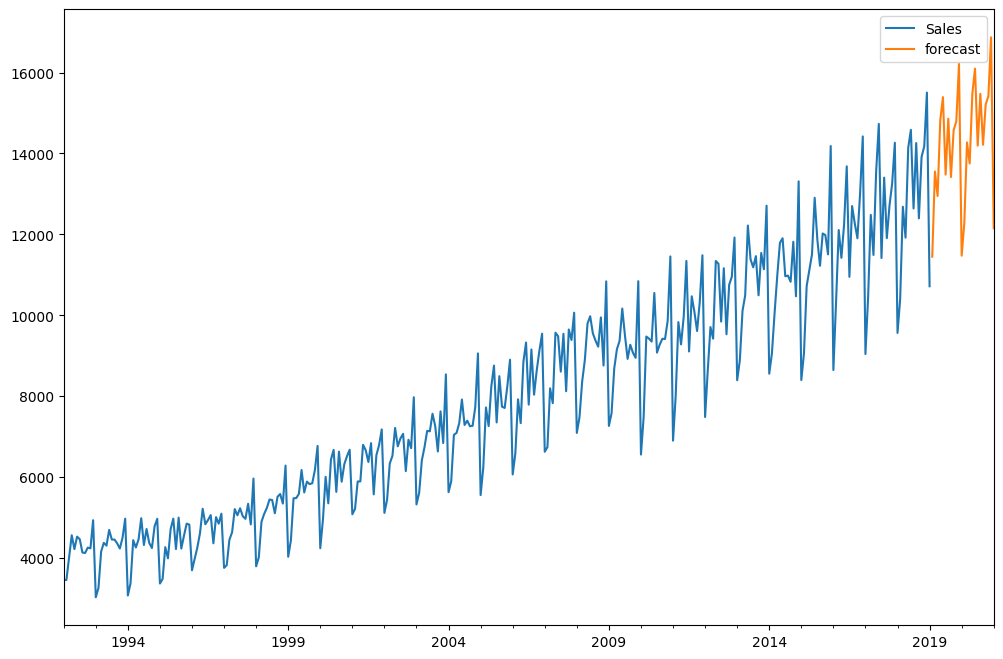

In [77]:
combined_df['forecast']=results.predict(start=325,end=349,dynamic=True)
combined_df[['Sales','forecast']].plot(figsize=(12,8))